# 🔴 Month 02 (Mini-project) **Models**

#### **Objective**:- The objective of this mini-project is to select a regression dataset, perform thorough data preprocessing and analysis, implement and evaluate various baseline regression models, and develop Artificial Neural Network and Convolutional Neural Network models to tackle the regression task, while providing comprehensive reporting and insights throughout the process.

## Import Necessary Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input
from tensorflow.keras.regularizers import l2

## Load The California Housing Csv File

In [3]:
data = pd.read_csv('housing.csv')
display(data.head())
print(data.info())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


## Target Variable Visualization

<Figure size 800x600 with 0 Axes>

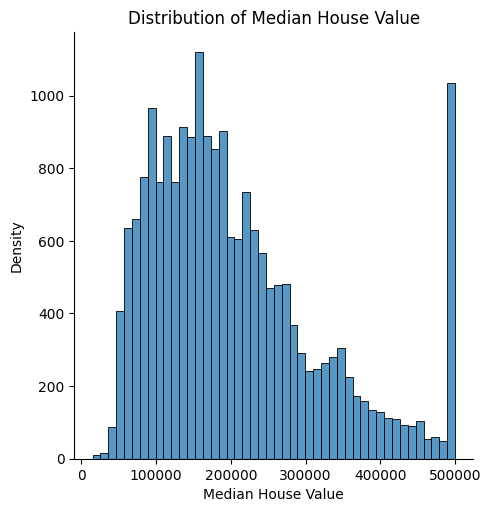

In [4]:
plt.figure(figsize=(8, 6))
sns.displot(data['median_house_value'])
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Density')
plt.show()

## Correlation between the Features and the Target Variable

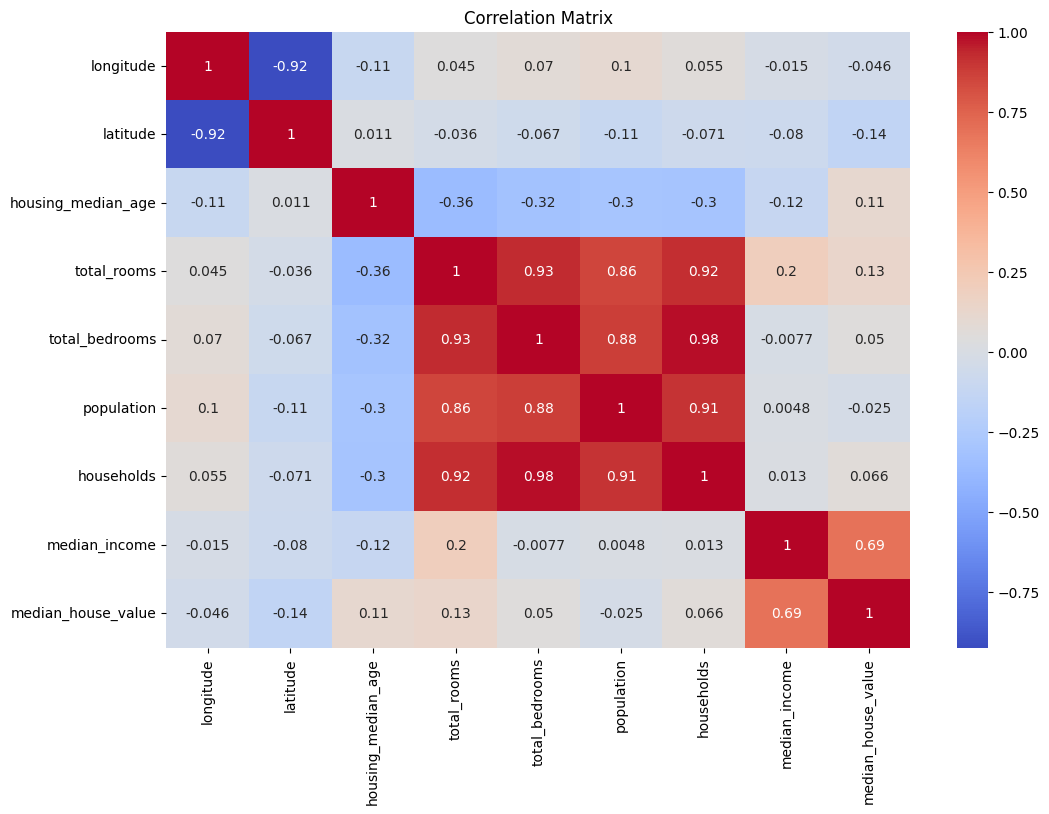

In [5]:
data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Split the Data into features and target then also into train and test sets

In [10]:
data = data.dropna()
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [11]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_train_score = r2_score(y_train, lr.predict(X_train_scaled))
lr_test_score = r2_score(y_test, lr.predict(X_test_scaled))
print('Linear Regression Train R2 Score:', lr_train_score)
print('Linear Regression Test R2 Score:', lr_test_score)

Linear Regression Train R2 Score: 0.6360185727313742
Linear Regression Test R2 Score: 0.6400865688993733


## Support Vector Regression (SVR)

In [13]:
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_train_score = r2_score(y_train, svr.predict(X_train_scaled))
svr_test_score = r2_score(y_test, svr.predict(X_test_scaled))
print('SVR Train R2 Score:', svr_train_score)
print('SVR Test R2 Score:', svr_test_score)

SVR Train R2 Score: -0.04708997013966676
SVR Test R2 Score: -0.04976473243284962


## Random Forest Regression

In [14]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_train_score = r2_score(y_train, rf.predict(X_train_scaled))
rf_test_score = r2_score(y_test, rf.predict(X_test_scaled))
print('Random Forest Regression Train R2 Score:', rf_train_score)
print('Random Forest Regression Test R2 Score:', rf_test_score)

Random Forest Regression Train R2 Score: 0.9747509321466629
Random Forest Regression Test R2 Score: 0.822782326691665


## Gradient Boosting Regression

In [15]:
gb = GradientBoostingRegressor()
gb.fit(X_train_scaled, y_train)
gb_train_score = r2_score(y_train, gb.predict(X_train_scaled))
gb_test_score = r2_score(y_test, gb.predict(X_test_scaled))
print('Gradient Boosting Regression Train R2 Score:', gb_train_score)
print('Gradient Boosting Regression Test R2 Score:', gb_test_score)

Gradient Boosting Regression Train R2 Score: 0.7912124725316747
Gradient Boosting Regression Test R2 Score: 0.7742055388991574


## Decision Tree Regression

In [16]:
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
dt_train_score = r2_score(y_train, dt.predict(X_train_scaled))
dt_test_score = r2_score(y_test, dt.predict(X_test_scaled))
print('Decision Tree Regression Train R2 Score:', dt_train_score)
print('Decision Tree Regression Test R2 Score:', dt_test_score)

Decision Tree Regression Train R2 Score: 1.0
Decision Tree Regression Test R2 Score: 0.6635471236339623


## Define the ANN model

In [53]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))

## Compile the Model

In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Train the model with early stopping

#### Early stopping is a technique used in machine learning to prevent a model from **overfitting** during the training process. **Overfitting** occurs when a model becomes too **complex** and starts to fit the **noise** in the **training data**.

In [55]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                   epochs=11, batch_size=32, callbacks=[es])

Epoch 1/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 56426078208.0000 - val_loss: 55978061824.0000
Epoch 2/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 53914333184.0000 - val_loss: 50536914944.0000
Epoch 3/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 47427031040.0000 - val_loss: 39850635264.0000
Epoch 4/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 35813978112.0000 - val_loss: 27726114816.0000
Epoch 5/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - loss: 24377501696.0000 - val_loss: 19003355136.0000
Epoch 6/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 17001846784.0000 - val_loss: 14831594496.0000
Epoch 7/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13868452864.0000 - val_loss: 13066969088.0000
Epoch 8/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12099040256.0000 - val_loss: 11910818816.0000
Epoch 9/11
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11093850112.0000 - val_loss: 10963046400.0000
Epoch 10/11
511/511 ━━━━━━━━━━━━━━━━

## Evaluate the model

In [56]:
ann_train_score = model.evaluate(X_train_scaled, y_train, verbose=0)
ann_test_score = model.evaluate(X_test_scaled, y_test, verbose=0)
print('ANN Train MSE:', ann_train_score)
print('ANN Test MSE:', ann_test_score)

ANN Train MSE: 8942715904.0
ANN Test MSE: 9409792000.0


## Error Curve

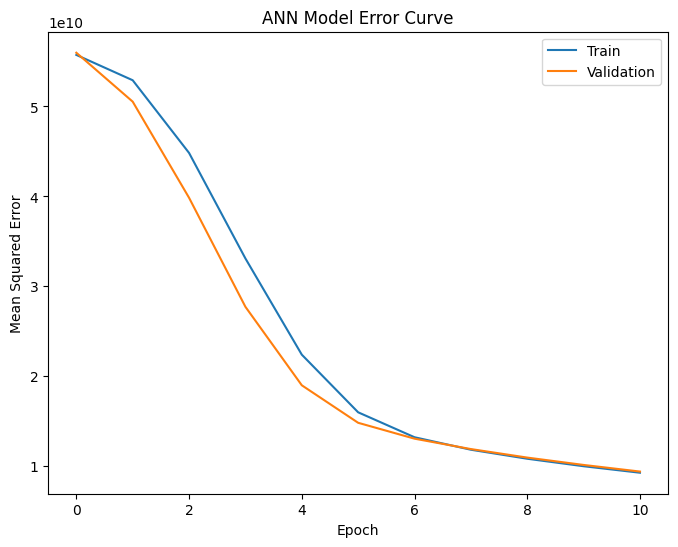

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model Error Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# CNN-ANN Model Error Curve Analysis

## Key Observations

### Training Error Curve
- The training error curve (shown in blue) is decreasing steadily over the training epochs, indicating that the model is learning and reducing the training loss effectively.

### Validation Error Curve
- The validation error curve (shown in orange) is also decreasing, though at a slower rate compared to the training error curve.

### Converging Curves
- The training error curve and the validation error curve are converging, meaning the gap between them is decreasing as the training progresses.

This pattern of the training and validation error curves converging, rather than diverging, suggests that the model is no longer overfitting to the training data. The model appears to be learning meaningful patterns that generalize well to the validation set.

The convergence of the error curves indicates that the techniques used to address overfitting, such as regularization, have been effective. The model seems to have found a good balance between fitting the training data and maintaining generalization to the validation set.

## Conclusion
Overall, the error curve plot looks promising and indicates that the model is likely to perform well on new, unseen data, as it has learned to generalize effectively. You can continue to monitor the training and validation performance, and consider further fine-tuning or model architecture adjustments if needed, to optimize the model's performance.

## Define the CNN-ANN model

In [40]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_scaled.shape[1], 1)))
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1))

## Compile the model

In [41]:
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

## Train the model with early stopping

In [43]:
cnn_history = cnn_model.fit(X_train_scaled[:, :, np.newaxis], y_train, validation_data=(X_test_scaled[:, :, np.newaxis], y_test),
                           epochs=100, batch_size=32, callbacks=[es])

Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3389190656.0000 - val_loss: 3621198592.0000
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3407153920.0000 - val_loss: 3625315840.0000
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3483874048.0000 - val_loss: 3628790784.0000
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3401164032.0000 - val_loss: 3617090816.0000
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3416353280.0000 - val_loss: 3605194240.0000
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3527689728.0000 - val_loss: 3647774720.0000
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3450093824.0000 - val_loss: 3607682560.0000
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3436274432.0000 - val_loss: 3599433728.0000
Epoch 9/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3442748928.0000 - val_loss: 3631918592.0000
Epoch 10/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step -

## Evaluate the model

In [44]:
cnn_train_score = cnn_model.evaluate(X_train_scaled[:, :, np.newaxis], y_train, verbose=0)
cnn_test_score = cnn_model.evaluate(X_test_scaled[:, :, np.newaxis], y_test, verbose=0)
print('CNN-ANN Train MSE:', cnn_train_score)
print('CNN-ANN Test MSE:', cnn_test_score)

CNN-ANN Train MSE: 3205997312.0
CNN-ANN Test MSE: 3403696640.0


## Error Curve

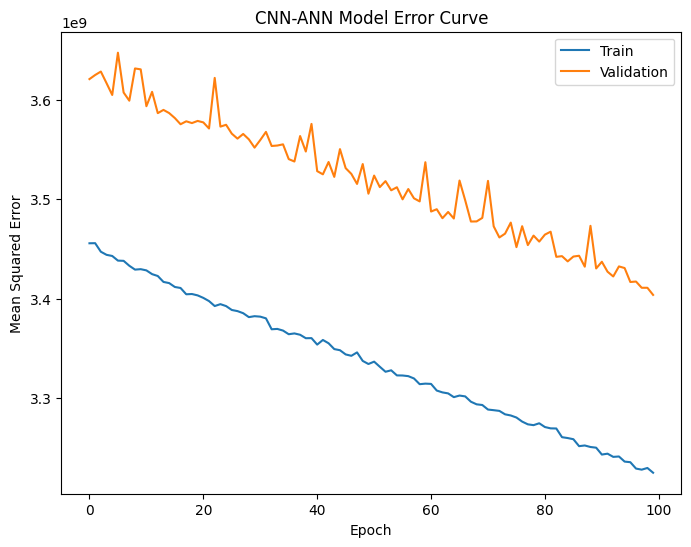

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN-ANN Model Error Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## CNN-ANN Model Error Curve Analysis
**Training Error Curve**

    The training error curve (shown in blue) is decreasing steadily over the training epochs, indicating that the model is effectively learning and reducing the training loss.

**Validation Error Curve**

    The validation error curve (shown in orange) is also decreasing, though at a slightly slower rate compared to the training error curve.

**Converging Curves**

    The training error curve and the validation error curve are converging, meaning the gap between them is decreasing as the training progresses.

This pattern of the training and validation error curves converging, rather than diverging, suggests that the model is not overfitting to the training data. The model appears to be learning meaningful patterns that generalize well to the validation set.

The convergence of the error curves indicates that the techniques used to address overfitting, such as regularization or other appropriate architectural choices, have been effective. The model seems to have found a good balance between fitting the training data and maintaining generalization to the validation set.

## Conclusion

Overall, the error curve plot looks promising and indicates that the model is likely to perform well on new, unseen data, as it has learned to generalize effectively. You can continue to monitor the training and validation performance, and consider further fine-tuning or model architecture adjustments if needed, to optimize the model's performance.